<a href="https://colab.research.google.com/github/Geetika2282/NLP-AI/blob/main/20_Text_Classification_Centroid_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the dataset

In [ ]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [ ]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
print(df.iloc[0]['Resume'])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

### Seperate the input and output data

In [ ]:
# input data
x = df['Resume']

# output data
y = df['Category']

<Axes: xlabel='count', ylabel='Category'>

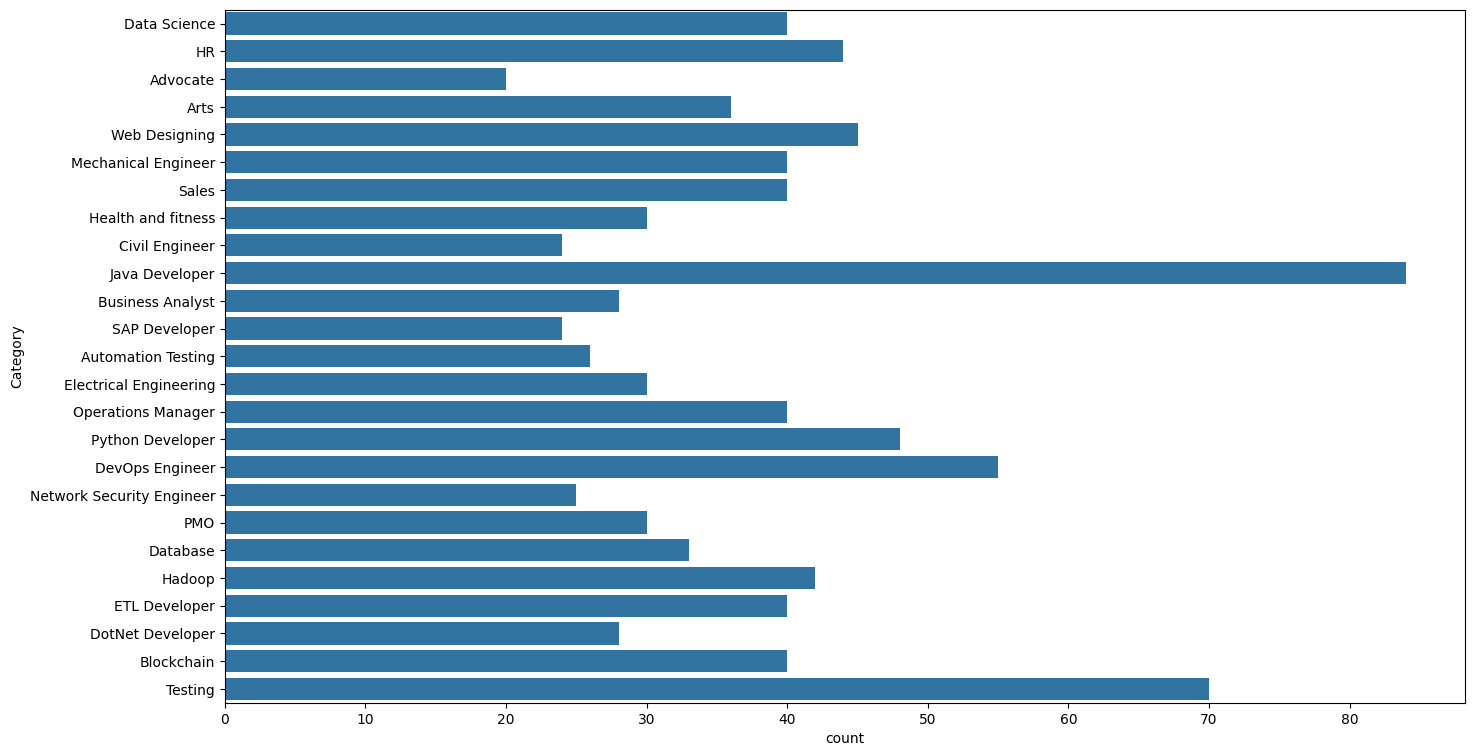

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(y)

In [ ]:
y.value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


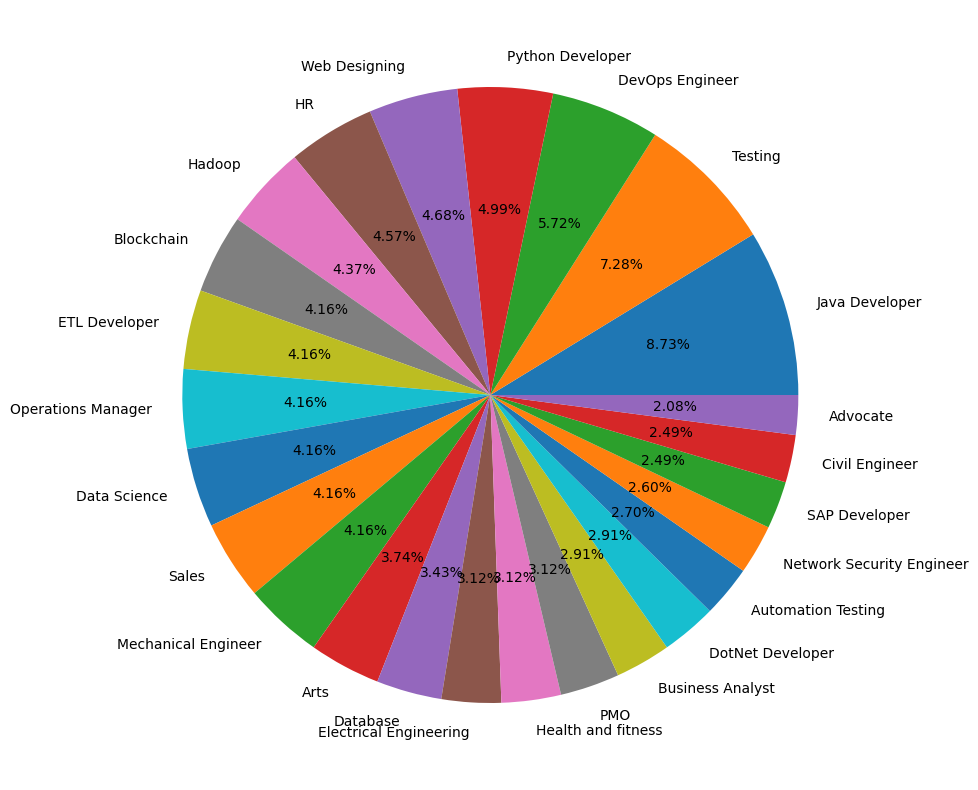

In [ ]:
plt.figure(figsize=(10,10))
plt.pie( y.value_counts(),labels=y.value_counts().index,autopct='%2.2f%%');

### Data Cleaning

In [ ]:
import re
import string

In [ ]:
def cleanResume(resumeText):
  resumeText = re.sub('http\S+\s*',' ',resumeText) # remove URLs
  resumeText = re.sub('RT|cc',' ',resumeText) # remove RT and cc
  resumeText = re.sub('#\S+',' ',resumeText) # remove hashtags
  resumeText = re.sub('@\S+',' ',resumeText) # remove mentions
  resumeText = re.sub('[%s]' % re.escape(string.punctuation),' ',resumeText) # remove punctuations
  resumeText = re.sub(r'[^\x00-\x7f]',r' ',resumeText)
  resumeText = re.sub('\s+',' ',resumeText) # remove extra whitespace
  return resumeText

In [ ]:
cleanedResume = cleanResume(x[0])

In [ ]:
cleanedResume

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

### Word Cloud

In [ ]:
cleandata = ''
for i in range(900):
  cleandata +=cleanResume(x[i])

In [ ]:
len(cleandata)

2698185

In [ ]:
from wordcloud import WordCloud

In [ ]:
wcloud = WordCloud(background_color='black').generate(cleandata)

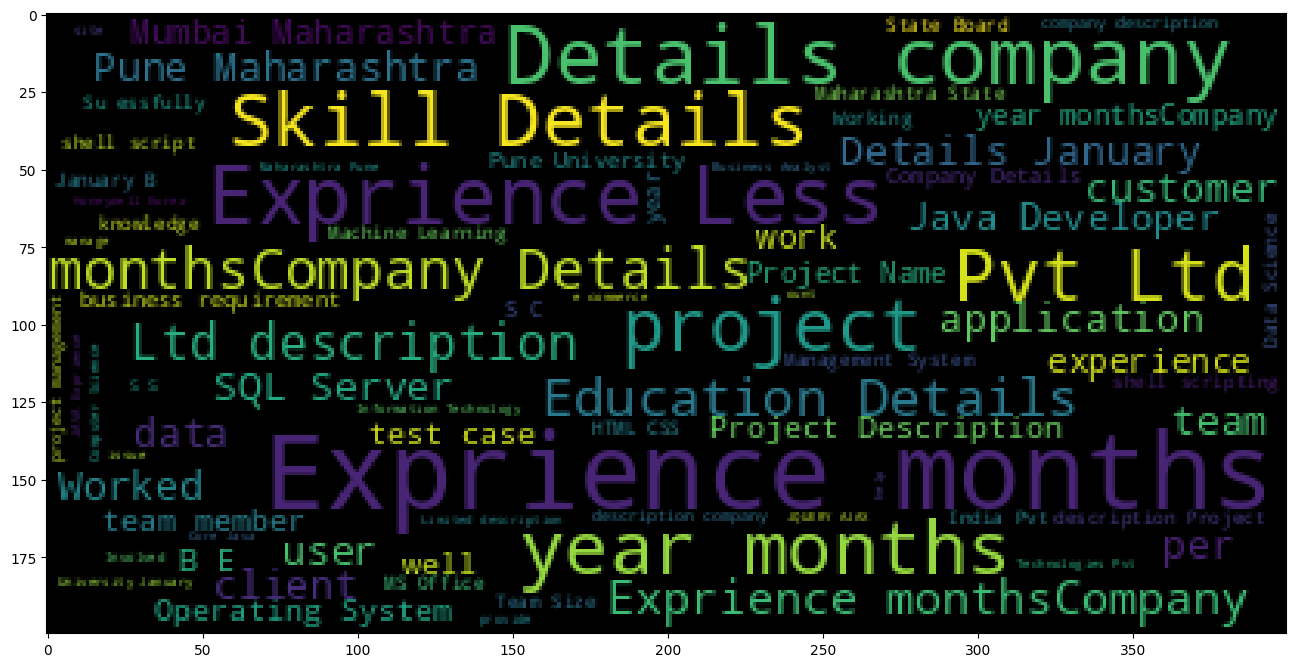

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [ ]:
cleaned = x.apply(cleanResume)

In [ ]:
cleaned

,Resume
0,Skills Programming Languages Python pandas num...
1,Education Details May 2013 to May 2017 B E UIT...
2,Areas of Interest Deep Learning Control System...
3,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Education Details MCA YMCAUST Faridabad Haryan...
...,...
957,Computer Skills Proficient in MS office Word B...
958,Willingness to a ept the challenges Positive ...
959,PERSONAL SKILLS Quick learner Eagerness to lea...
960,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


### TF*IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
x_new = tfidf.fit_transform(cleaned)

In [ ]:
x_new.shape

(962, 7351)

In [ ]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

### Cross - Validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_new,y,random_state=0)

In [ ]:
X_train.shape , X_test.shape

((721, 7351), (241, 7351))

### Build the model

In [ ]:
from sklearn.neighbors import NearestCentroid

In [ ]:
nc = NearestCentroid()

In [ ]:
nc.fit(X_train,y_train)

NearestCentroid()

In [ ]:
len(nc.centroids_)

25

### Performance evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [ ]:
y_pred = nc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9875518672199171

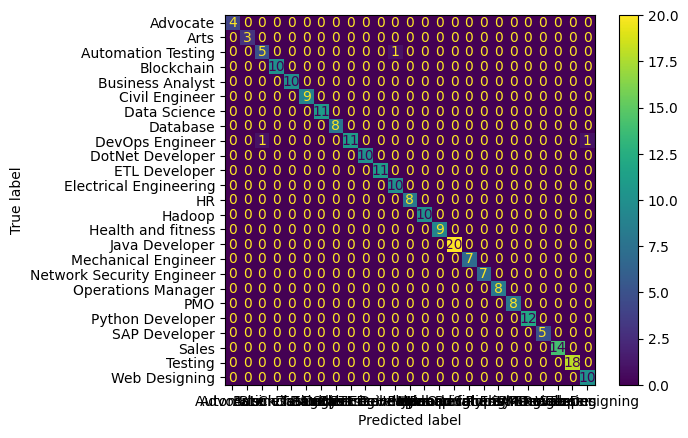

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       0.83      0.83      0.83         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00        10
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.85      0.92        13
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       0.91      1.00      0.95        10
                       HR       1.00      1.00      1.00         8
                   Hadoop       1.00      1.00      1.00     

### Prediction on unseen data

In [ ]:
file = open('Sample_resume.txt')
resume = file.read()

In [ ]:
clean_resume = cleanResume(resume)

In [ ]:
test_new = tfidf.transform([clean_resume])

In [ ]:
y_pred = nc.predict(test_new)

In [ ]:
y_pred

array(['Data Science'], dtype=object)